In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=70)  # dots (pixels) per inch determine size of inline figures
sc.logging.print_versions()

-----
anndata     0.7.4
scanpy      1.6.0
sinfo       0.3.1
-----
PIL                 6.2.0
anndata             0.7.4
backcall            0.1.0
bottleneck          1.2.1
cairo               1.18.0
cffi                1.12.3
cloudpickle         1.2.2
colorama            0.4.1
cycler              0.10.0
cython_runtime      NA
cytoolz             0.10.0
dask                2.5.2
dateutil            2.8.0
decorator           4.4.0
get_version         2.1
h5py                2.10.0
igraph              0.7.1
importlib_metadata  0.23
ipykernel           5.1.2
ipython_genutils    0.2.0
ipywidgets          7.5.1
jedi                0.15.1
joblib              0.13.2
kiwisolver          1.1.0
legacy_api_wrap     1.2
leidenalg           0.7.0
llvmlite            0.34.0
matplotlib          3.3.2
mkl                 2.3.0
mkl_fft             1.0.14
more_itertools      NA
mpl_toolkits        NA
natsort             7.0.1
numba               0.51.2
numexpr             2.7.0
numpy               1.17.2
p

In [2]:
filename = "1M_neurons_filtered_gene_bc_matrices_h5.h5"

In [3]:
adata = sc.read_10x_h5(filename)

reading 1M_neurons_filtered_gene_bc_matrices_h5.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:01:17)


In [4]:
adata.var_names_make_unique()
anno = pd.read_csv("mouse_info.csv", dtype="str")
adata.obs['batch'] = anno['Mouse'].values
adata.obs

,batch
AAACCTGAGATAGGAG-1,A
AAACCTGAGCGGCTTC-1,A
AAACCTGAGGAATCGC-1,A
AAACCTGAGGACACCA-1,A
AAACCTGAGGCCCGTT-1,A
...,...
TTTGTCAGTCCGACGT-133,B
TTTGTCAGTGAAAGAG-133,B
TTTGTCAGTGCGATAG-133,B
TTTGTCAGTTAAAGTG-133,B


In [5]:
sc.pp.recipe_zheng17(adata)

running recipe zheng17
filtered out 3983 genes that are detected in less than 1 counts
normalizing counts per cell
    finished (0:00:33)
extracting highly variable genes
    finished (0:00:14)
normalizing counts per cell
    finished (0:00:01)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
    finished (0:02:43)


In [6]:
sc.tl.pca(adata)

computing PCA
    with n_comps=50
    finished (0:01:00)


In [7]:
# sc.pp.neighbors(adata) ## here, we can use bbknn instead (but we first need to have a batch variable)
sc.external.pp.bbknn(adata, batch_key='batch')

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:01:28)


In [8]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:28:48)


In [9]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 39 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:46:56)


In [10]:
adata.obs

,batch,n_counts_all,leiden
AAACCTGAGATAGGAG-1,A,4046.0,10
AAACCTGAGCGGCTTC-1,A,2087.0,1
AAACCTGAGGAATCGC-1,A,4654.0,9
AAACCTGAGGACACCA-1,A,3193.0,3
AAACCTGAGGCCCGTT-1,A,8444.0,6
...,...,...,...
TTTGTCAGTCCGACGT-133,B,4885.0,1
TTTGTCAGTGAAAGAG-133,B,2554.0,7
TTTGTCAGTGCGATAG-133,B,3080.0,5
TTTGTCAGTTAAAGTG-133,B,3849.0,11


... storing 'batch' as categorical


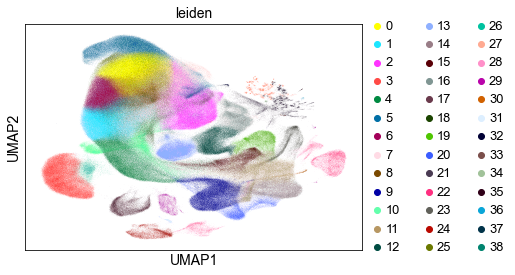

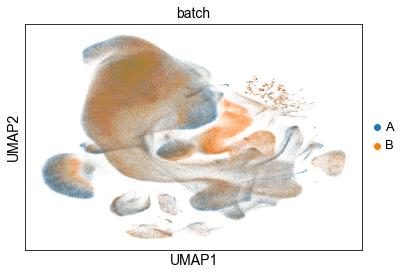

In [11]:
sc.pl.umap(adata, color="leiden")
sc.pl.umap(adata, color="batch")

In [12]:
adata.write("1M_neurons_leiden.h5ad")

In [16]:
adata.obs.to_csv("1M_neurons_leiden_labels.csv")

In [25]:
adata.shape

(1306127, 1000)

In [27]:
adata.obsm['X_pca']

array([[-2.1672323 , -0.592829  , -0.25494295, ...,  1.09416   ,
        -1.3984382 ,  0.92898816],
       [-2.6490035 , -1.7573144 , -0.04031737, ..., -0.7668177 ,
         0.5042623 , -0.30292374],
       [ 4.506457  , 10.9438    , -0.02082748, ..., -0.54689544,
        -0.46623465, -0.9556588 ],
       ...,
       [-2.1334743 , -3.7928164 , -0.3406871 , ..., -0.45831215,
        -0.4238563 , -0.09092334],
       [ 2.0288777 ,  8.402097  , -0.07352675, ...,  0.07976408,
        -1.5171962 ,  2.1322339 ],
       [-0.3514667 ,  0.5623689 ,  0.37985215, ...,  0.6170977 ,
        -1.0475274 ,  1.4405607 ]], dtype=float32)